# About dataset

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

**Attribute information:**

- **Gender**: M(male), F(female)
- **Age**: Age of the patient
- **Smoking**: YES=2, NO=1
- **Yellow fingers**: YES=2, NO=1
- **Anxiety**: YES=2, NO=1
- **Peer_pressure**: YES=2, NO=1
- **Chronic Disease**: YES=2, NO=1
- **Fatigue**: YES=2, NO=1
- **Allergy**: YES=2, NO=1
- **Wheezing**: YES=2, NO=1
- **Alcohol**: YES=2, NO=1
- **Coughing**: YES=2, NO=1
- **Shortness of Breath**: YES=2, NO=1
- **Swallowing Difficulty**: YES=2, NO=1
- **Chest pain**: YES=2, NO=1
- **Lung Cancer**: YES, NO

### Importing Required Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# For machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

### Step 1: Load the Dataset

In [170]:
df = pd.read_csv('survey_lung_cancer.csv')

In [171]:
# Display the first few rows of the dataset
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Step 2: Check and Remove Duplicates and Nulls

In [172]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 33


In [173]:
# Remove duplicates
df = df.drop_duplicates()

In [174]:
# Check nulls
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [175]:
# Confirm removal
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (276, 16)


### Step 3: Explore Dataset Information

In [176]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

### Step 4: Target Variable Distribution

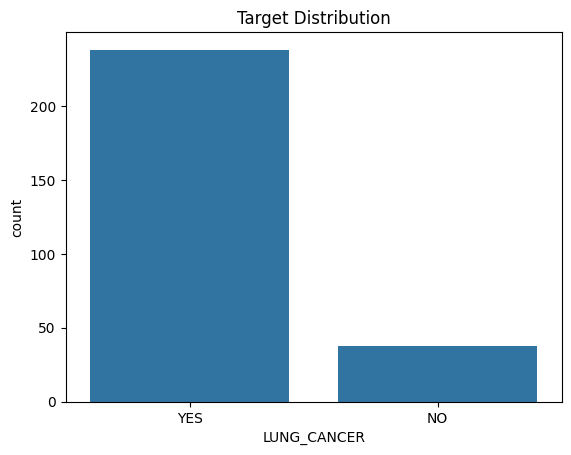

In [177]:
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Target Distribution')
plt.show()

In [178]:
# Check the value counts of the target variable
print(df['LUNG_CANCER'].value_counts())

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


### Step 5: Encode Categorical Variables

In [179]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [180]:
# Confirm encoding
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0


### Step 6: Define Features and Target

In [181]:
# Separate features and target
X = df.drop(columns=['LUNG_CANCER'])  # Features
y = df['LUNG_CANCER']                # Target

### Step 7: Feature Correlation Analysis

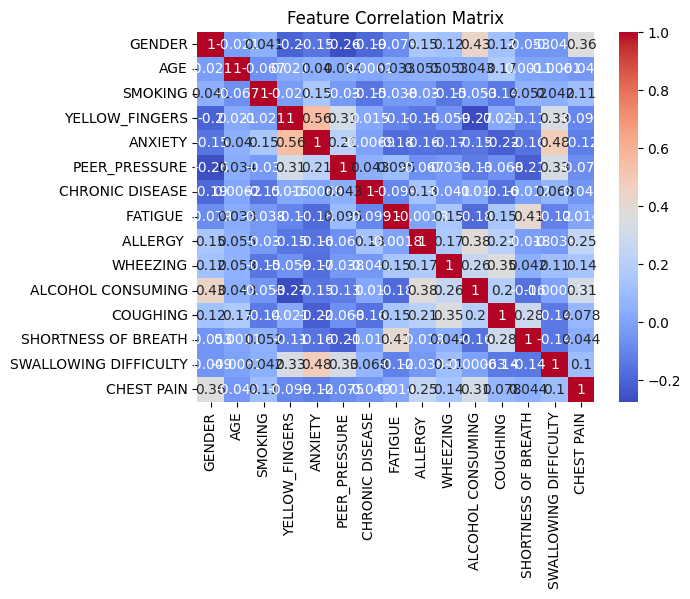

In [182]:
# Plot the correlation matrix
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [183]:
# Drop less relevant features based on correlation analysis
X = X.drop(columns=['YELLOW_FINGERS', 'GENDER'])

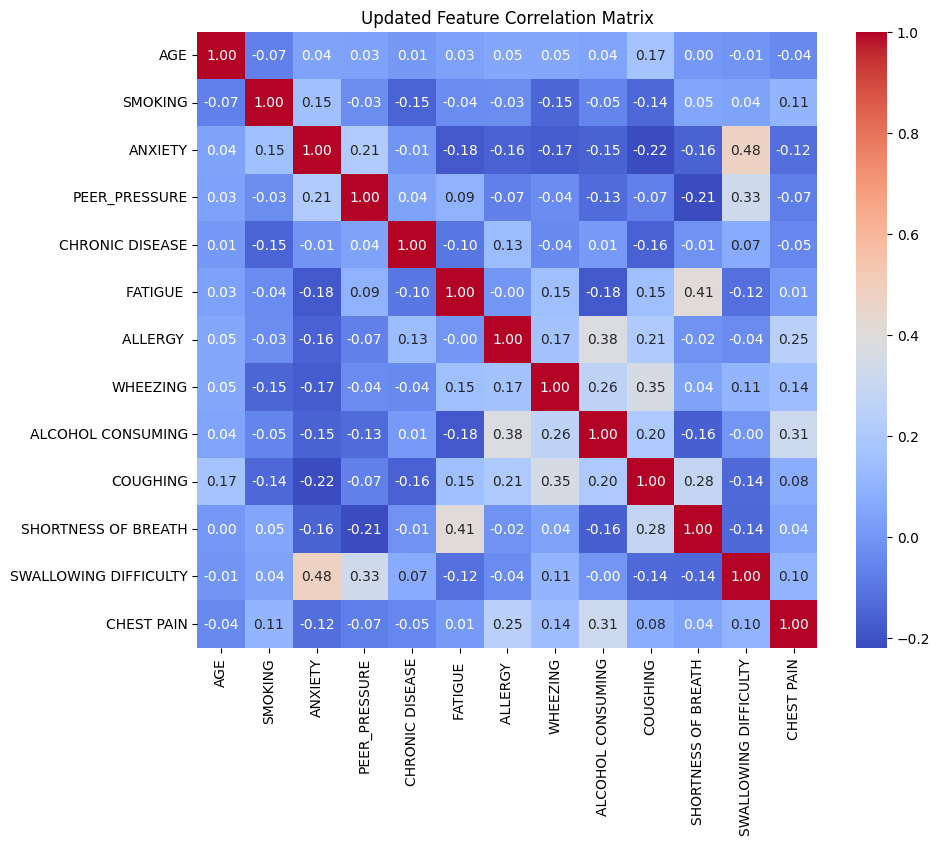

In [184]:
# Updated correlation matrix
corr_matrix_updated = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_updated, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Updated Feature Correlation Matrix')
plt.show()

### Step 8: Handle Class Imbalance with SMOTE

In [185]:
# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Verify class distribution in train and test sets
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())

print("Class distribution in y_test:")
print(pd.Series(y_test).value_counts())

Class distribution after SMOTE:
LUNG_CANCER
1    238
0    238
Name: count, dtype: int64
Class distribution in y_train:
LUNG_CANCER
1    179
0    178
Name: count, dtype: int64
Class distribution in y_test:
LUNG_CANCER
0    60
1    59
Name: count, dtype: int64


### Step 9: K-Nearest Neighbors (KNN) Model

In [186]:
# KNN Class
class KNNModel:
    def __init__(self):
        # Hyperparameters definition
        self.params = {
            "n_neighbors": [5, 7],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree"],
            "metric": ["euclidean", "manhattan"]
        }

    def train(self, x_train, y_train):
        # Define the model
        model = KNeighborsClassifier()

        # Hyperparameter optimization
        grid_search = GridSearchCV(estimator=model,
                                   param_grid=self.params,
                                   scoring="accuracy",
                                   cv=5,
                                   n_jobs=-1)
        grid_search.fit(x_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_
        print("Best KNN Parameters:", grid_search.best_params_)

        return best_model


In [187]:
# Train and evaluate KNN
knn = KNNModel()
knn_model = knn.train(X_train, y_train)


Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [188]:
# Evaluate the model on the test set
y_knn_pred = knn_model.predict(X_test)

In [189]:

print("KNN Classification Report:")
print(classification_report(y_test, y_knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.95      0.93      0.94        59

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



### Step 10: SVM Model Implementation

In [190]:
# SVM Class
class SVMModel:
    def __init__(self):
        # Hyperparameters definition
        self.params = {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"],
            "degree": [2, 3],
            "class_weight": ["balanced"]
        }

    def train(self, x_train, y_train):
        # Define the model
        model = SVC()

        # Hyperparameter optimization
        grid_search = GridSearchCV(estimator=model,
                                   param_grid=self.params,
                                   scoring="accuracy",
                                   cv=5,
                                   n_jobs=-1)
        grid_search.fit(x_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_
        print("Best SVM Parameters:", grid_search.best_params_)

        return best_model

In [191]:
# Train and evaluate SVM
svm = SVMModel()
svm_model = svm.train(X_train, y_train)

Best SVM Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [192]:
# Evaluate the model on the test set
y_svm_pred = svm_model.predict(X_test)

In [193]:
print("SVM Classification Report:")
print(classification_report(y_test, y_svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.94      0.98      0.96        59

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119

